<a href="https://colab.research.google.com/github/Dansah2/Udacity_Tutorials/blob/main/Udacity_TimeSeries_NaiveForcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_series(time, series, format='-', start=0, end=None, label=None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('Value')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

def trend(time, slope=0):
  return slope * time

def seasonal_pattern(season_time):
  return np.where(season_time < 0.4,
                  np.cos(season_time * np.pi),
                  1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

def white_noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

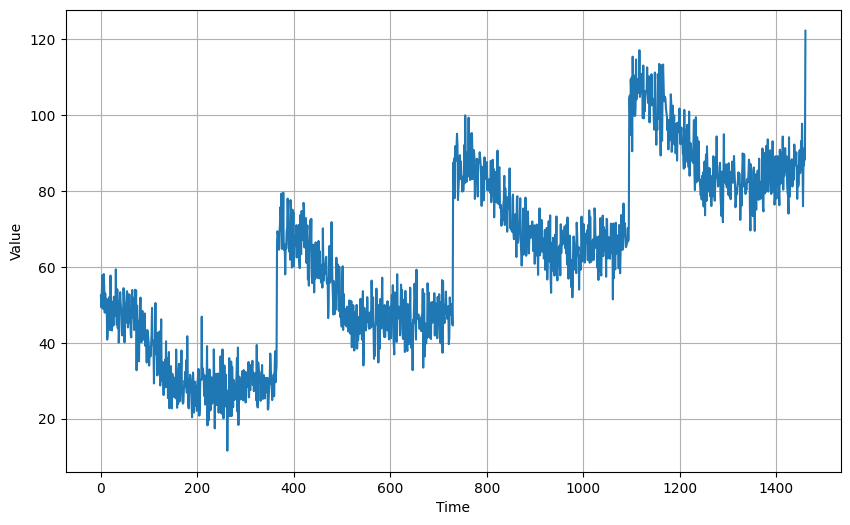

In [ ]:
# trend and seasonality

time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

noise_level = 5
noise = white_noise(time, noise_level, seed=42)

series += noise

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [ ]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

len(time_train), len(x_train), len(time_valid), len(x_valid)

(1000, 1000, 461, 461)

In [ ]:
# naive forcast
naive_forcast = series[split_time - 1:-1]

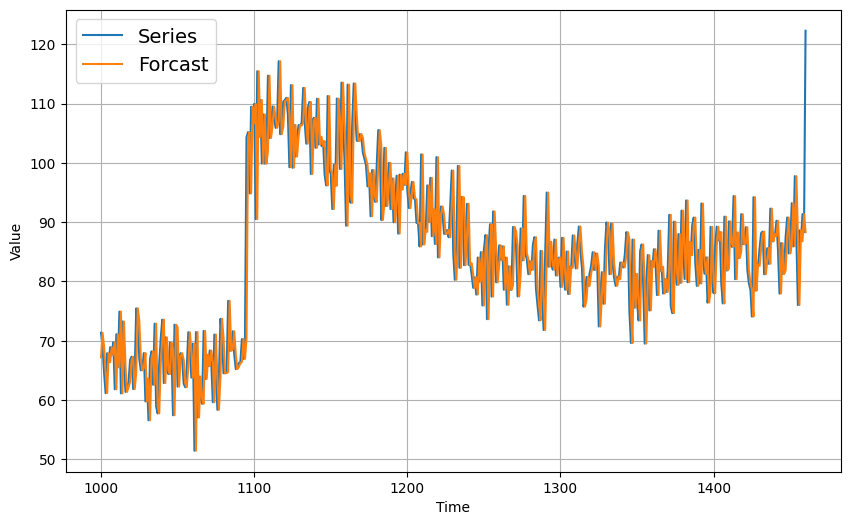

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid, label='Series')
plot_series(time_valid, naive_forcast, label='Forcast')


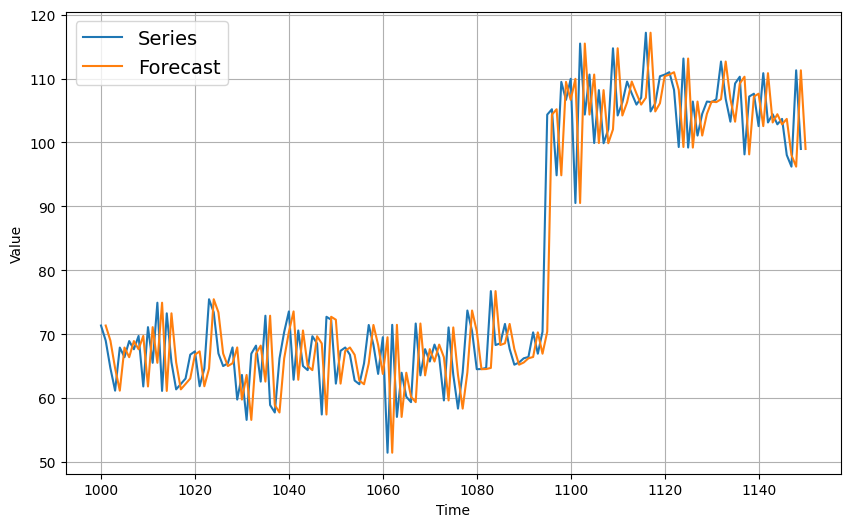

In [ ]:
# isolate the beginning of the validation period
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid, start=0, end=150, label='Series')
plot_series(time_valid, naive_forcast, start=1, end=151, label='Forecast')

In [ ]:
# compute MAE between forcast and predictions
errors = naive_forcast - x_valid
abs_errors = np.abs(errors)
mae = abs_errors.mean()
mae

5.831771756370457